In [1]:
pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
#loading the dataset
df = pd.read_csv("Dataset 2.csv")
df.head()


,COIL_ID,GRADE,COIL_GEN_TIME,FURN_EXIT_TEMP,FM_DOUT_TEMP,COILING_TEMP,SLAB_WID,SLAB_LEN,STRIP_EXIT_LEN,STRIP_EXIT_THIK,...,N,NI,P,S,SI,TI,V,UTS,YS,P_ELONGATION
0,20081459,JVHGLD4AS0,8/10/2020 2:25,1081,869,680,1125,10750.0,69.81,34,...,0.0025,0.007,0.018,0.0100,0.004,0.001,0.001,346,294,42
1,20097626,JVHGLD4AS0,9/14/2020 2:30,1070,838,662,1245,10640.0,68.63,34,...,0.0022,0.007,0.014,0.0100,0.007,0.001,0.001,365,299,42
2,20097722,JVHCM30A00,9/14/2020 6:47,1075,882,611,1040,10750.0,66.08,36,...,0.0070,0.008,0.015,0.0030,0.164,0.002,0.001,730,575,21
3,20098318,JVHST01C00,9/15/2020 11:55,1088,864,603,1260,9000.0,51.94,38,...,0.0035,0.008,0.021,0.0131,0.099,0.002,0.001,495,397,30
4,20098589,JVHWT02A00,9/16/2020 1:14,1061,848,650,1265,9811.0,61.23,35,...,0.0032,0.007,0.015,0.0101,0.006,0.001,0.001,379,326,41


In [5]:
X=df.drop(['UTS','YS','P_ELONGATION','COIL_ID','GRADE','COIL_GEN_TIME'],axis=1)
X.head()

,FURN_EXIT_TEMP,FM_DOUT_TEMP,COILING_TEMP,SLAB_WID,SLAB_LEN,STRIP_EXIT_LEN,STRIP_EXIT_THIK,FM_EXIT_THIK,AL,B,...,CU,MN,MO,N,NI,P,S,SI,TI,V
0,1081,869,680,1125,10750.0,69.81,34,1.99,0.048,0.0001,...,0.007,0.20,0.001,0.0025,0.007,0.018,0.0100,0.004,0.001,0.001
1,1070,838,662,1245,10640.0,68.63,34,2.05,0.051,0.0001,...,0.006,0.23,0.001,0.0022,0.007,0.014,0.0100,0.007,0.001,0.001
2,1075,882,611,1040,10750.0,66.08,36,2.49,0.032,0.0001,...,0.006,1.35,0.001,0.0070,0.008,0.015,0.0030,0.164,0.002,0.001
3,1088,864,603,1260,9000.0,51.94,38,4.99,0.053,0.0003,...,0.010,0.75,0.001,0.0035,0.008,0.021,0.0131,0.099,0.002,0.001
4,1061,848,650,1265,9811.0,61.23,35,2.31,0.051,0.0001,...,0.005,0.32,0.001,0.0032,0.007,0.015,0.0101,0.006,0.001,0.001


In [6]:
y=df[['UTS']].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((32771, 24), (8193, 24), (32771, 1), (8193, 1))

In [8]:
pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:

import autosklearn.regression
automl = autosklearn.regression.AutoSklearnRegressor(
time_left_for_this_task=5*60,per_run_time_limit=30)

In [10]:
automl.fit(X_train, y_train)
from sklearn.metrics import mean_absolute_error
from autosklearn.metrics import mean_absolute_error as auto_mean_absolute_error

In [11]:
# summarize
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: 057efee8-00fe-11ed-8224-0242ac1c0002
  Metric: r2
  Best validation score: 0.940410
  Number of target algorithm runs: 14
  Number of successful target algorithm runs: 5
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 9
  Number of target algorithms that exceeded the memory limit: 0



In [12]:
# evaluate the best model
y_pred = automl.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: %.3f" % mae)

MAE: 7.615


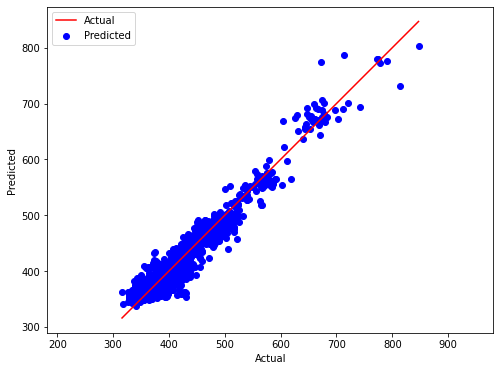

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, c='blue')
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)
plt.legend(['Actual', 'Predicted'])
plt.axis('equal')
plt.show()